In [2]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2024-08-07 14:55:33--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-07 14:55:33 ERROR 404: Not Found.



ModuleNotFoundError: No module named 'dolfin'

In [ ]:
from fenics import *
from ufl_legacy import nabla_grad
from ufl_legacy import nabla_div
from mshr import *
import numpy as np
import sys


k = Constant(45) # steel conductivity coefficient w/m.k
h = Constant(40) # air convection coefficient w/m^2.k
T_inf = Constant(300)      # kelvin
T_0 = Constant(400)        # Kelvin
q = Constant(100)                    # heat flux w/m^2

# Define boundary condition
tol = 1E-14

mesh = UnitSquareMesh(32,32)
V = FunctionSpace(mesh, 'P', 1)

# plot(mesh)

# # defining boundary
# dirichlet = 'on_boundary && (near(x[0], 0, tol) or near(x[0], 1, tol))'
# neumann = 'on_boundary && (near(x[1], 0, tol))'
# robin = 'on_boundary && (near(x[1], 1, tol))'

# defining boundary markers
boundary_markers = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)

class BoundaryX0(SubDomain):
  tol = 1E-14
  def inside(self, x, on_boundary):
    return on_boundary and near(x[0], 0, tol)

class BoundaryX1(SubDomain):
  tol = 1E-14
  def inside(self, x, on_boundary):
    return on_boundary and near(x[0], 1, tol)

class BoundaryY0(SubDomain):
  tol = 1E-14
  def inside(self, x, on_boundary):
    return on_boundary and near(x[1], 0, tol)

class BoundaryY1(SubDomain):
  tol = 1E-14
  def inside(self, x, on_boundary):
    return on_boundary and near(x[1], 1, tol)

bx0 = BoundaryX0()
bx1 = BoundaryX1()
by0 = BoundaryY0()
by1 = BoundaryY1()

bx0.mark(boundary_markers, 1)  # Dirichlet x = 0
bx1.mark(boundary_markers, 2)  # Dirichlet x = 1
by0.mark(boundary_markers, 3)  # Neumann   y = 0
by1.mark(boundary_markers, 4)  # Robin     y = 1


# defining ds and dx of boundary markers
ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)
dx = Measure('dx', domain=mesh)

# defining boundary conditions
bcs = []
for i in range(1,3):
  bc = DirichletBC(V, T_0, boundary_markers, i)

  bcs.append(bc)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

a = k*dot(grad(u), grad(v))*dx + h*u*v*ds(4)
L = - q*v*ds(3) + h*T_inf*v*ds(4)

# Alternatively
# F = k*dot(grad(u), grad(v))*dx + h*u*v*ds(4) - q*v*ds(3) + h*T_inf*v*ds(4)
# a = rhs(F)
# L = lhs(F)


# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# # Plot solution and mesh
# plot(u, title='Temperature')

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00386214 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.367267 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_8681f5897f136b0e0871d877e741b4f7e78fe39e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              3
  Coefficients:                        '[f_1, f_2, f_4]'
  Unique elements:                     'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:                 'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0026412 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0129321 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00638723 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.010886 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00890899 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0124192 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3e77a08566e90ca76091657aa4b1a876f629266b

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of cell subdomains:           0
  Number of exterior_facet subdomains: 5
  Rank:                                2
  Arguments:                           '(v_0, v_1)'
  Number of coefficients:              2
  Coefficients:                        '[f_0, f_1]'
  Unique elements:                     'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:                 'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule

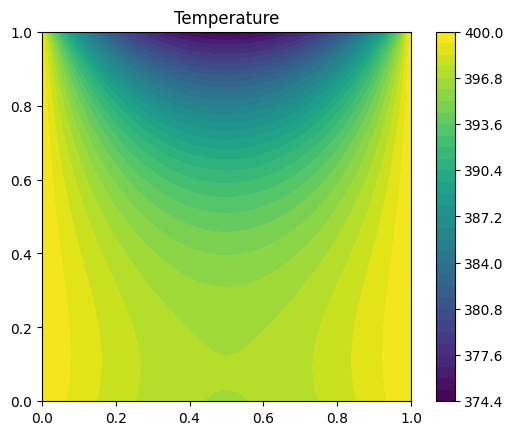

In [ ]:
# Plot solution and mesh

import matplotlib.pyplot as plt

p = plot(u, title='Temperature')

plt.colorbar(p)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

output_dir = '/content/drive/MyDrive/FEniCS'

# Save solution to file in VTK format
vtkfile = File(output_dir + '/solution.pvd')
vtkfile << u

# # Create XDMF files for visualization output
# xdmffile_u = XDMFFile(output_dir + '/Temperature.xdmf')
# xdmffile_u.write(u)



MessageError: ignored